### Binary Classification using Logistic Regression, Decision Tree and Random Forest to predict satisfaction of customer 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [4]:
#Y-Variable would be Satisfaction Column. We need to train a ML algo to predict Satisfaction

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [11]:
#Removing Duplicate Record
df.duplicated().sum()

172

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [17]:
#Removing Missing Values
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [19]:
#310 is a very small amount of data so we will remove it
df.dropna(inplace=True) #Each row will be deleted in which missing value is present

In [21]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [23]:
#Y has 2 classes for prediction so it is called binary classification

In [25]:
#Balancity of Data 
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58636
satisfied                  44786
Name: count, dtype: int64

In [27]:
#This dataset is a balanced dataset

In [29]:
df.head(2)

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0


In [31]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71331
Personal Travel    32091
Name: count, dtype: int64

In [33]:
df['Class'].value_counts()

Class
Business    49423
Eco         46532
Eco Plus     7467
Name: count, dtype: int64

In [35]:
df['Inflight entertainment'].max()

5

In [37]:
df['Inflight entertainment'].min()

0

In [39]:
df['Baggage handling'].max()

5

In [41]:
df['Baggage handling'].min()

1

In [43]:
df['Cleanliness'].max()

5

In [45]:
df['Cleanliness'].min()

0

In [47]:
df2 = df[(df['Inflight entertainment']==5)&(df['Baggage handling']==5)&(df['Cleanliness']==5)]

In [49]:
df2

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
17,Male,Loyal Customer,Business travel,Business,satisfied,41,2075,5,5,5,0,10.0
36,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,34,883,5,5,5,0,0.0
45,Male,Loyal Customer,Business travel,Business,satisfied,29,529,5,5,5,4,0.0
56,Female,Loyal Customer,Business travel,Business,satisfied,57,2496,5,5,5,0,5.0
70,Female,Loyal Customer,Business travel,Business,satisfied,53,1506,5,5,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103838,Male,Loyal Customer,Business travel,Business,satisfied,51,1723,5,5,5,14,2.0
103847,Male,Loyal Customer,Business travel,Business,satisfied,45,3727,5,5,5,0,0.0
103853,Female,Loyal Customer,Business travel,Eco,satisfied,49,760,5,5,5,0,21.0
103857,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,26,370,5,5,5,0,0.0


In [51]:
df2.shape

(6729, 12)

In [53]:
#Dissatisfied
df3 = df2[df2['satisfaction'] == 'neutral or dissatisfied']
df3

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
36,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,34,883,5,5,5,0,0.0
86,Female,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,57,500,5,5,5,0,0.0
87,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,44,689,5,5,5,0,0.0
249,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,27,925,5,5,5,4,3.0
261,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,53,552,5,5,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103685,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,42,372,5,5,5,0,5.0
103773,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,28,563,5,5,5,0,6.0
103812,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,28,814,5,5,5,212,212.0
103857,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,26,370,5,5,5,0,0.0


In [55]:
#Full rating Zero arrival and departure delay are 0 still dissatified
df4 = df3[(df3['Departure Delay in Minutes'] == 0)&(df['Arrival Delay in Minutes'] ==0)]
df4

C:\Users\Pranav\AppData\Local\Temp\ipykernel_14756\1341055788.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[(df3['Departure Delay in Minutes'] == 0)&(df['Arrival Delay in Minutes'] ==0)]


,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
36,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,34,883,5,5,5,0,0.0
86,Female,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,57,500,5,5,5,0,0.0
87,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,44,689,5,5,5,0,0.0
261,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,53,552,5,5,5,0,0.0
343,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,36,327,5,5,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103354,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,59,696,5,5,5,0,0.0
103484,Female,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,23,834,5,5,5,0,0.0
103486,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,24,101,5,5,5,0,0.0
103642,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,23,436,5,5,5,0,0.0


In [57]:
df2['Customer Type'].value_counts()

Customer Type
Loyal Customer       5805
disloyal Customer     924
Name: count, dtype: int64

In [59]:
female = df[df['Gender']=='Female']
female

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
5,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,26,1180,1,4,1,0,0.0
7,Female,Loyal Customer,Business travel,Business,satisfied,52,2035,5,5,4,4,0.0
8,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,41,853,1,1,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103893,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,58,296,3,3,1,0,29.0
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,24,1055,1,5,1,13,10.0
103897,Female,Loyal Customer,Business travel,Business,satisfied,60,1599,4,4,4,9,7.0
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0


In [61]:
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42272
disloyal Customer    10228
Name: count, dtype: int64

In [63]:
df5 = female[female['satisfaction'] == 'satisfied']
df5

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
7,Female,Loyal Customer,Business travel,Business,satisfied,52,2035,5,5,4,4,0.0
16,Female,Loyal Customer,Business travel,Business,satisfied,26,2123,4,4,4,49,51.0
18,Female,Loyal Customer,Business travel,Business,satisfied,45,2486,5,5,4,7,5.0
24,Female,disloyal Customer,Business travel,Eco,satisfied,23,452,1,5,1,54,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,Female,Loyal Customer,Business travel,Business,satisfied,51,384,4,4,3,54,51.0
103887,Female,Loyal Customer,Personal Travel,Eco,satisfied,51,1222,3,3,4,4,0.0
103889,Female,Loyal Customer,Business travel,Business,satisfied,43,3885,3,3,3,0,0.0
103890,Female,Loyal Customer,Business travel,Eco Plus,satisfied,56,550,3,3,3,0,0.0


In [65]:
df5['Baggage handling'].value_counts()
#1009 Female Passengers who are satisfied still they gave 1 star

Baggage handling
4    8983
5    8479
3    2284
2    1660
1    1009
Name: count, dtype: int64

#### Data Conversion into numerical form

In [68]:
# df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [70]:
# df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})

In [72]:
# df['Type of Travel'] = df['Type of Travel'].map({

In [74]:
#The above methods are very time taking for high no. of columns 
#So the below method is a shortcut method

In [76]:
df6 = pd.get_dummies(df,drop_first='if_binary').astype('int')
df6
#One hot encoding representation

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [78]:
df6.isnull().sum()

Age                                0
Flight Distance                    0
Inflight entertainment             0
Baggage handling                   0
Cleanliness                        0
Departure Delay in Minutes         0
Arrival Delay in Minutes           0
Gender_Male                        0
Customer Type_disloyal Customer    0
Type of Travel_Personal Travel     0
Class_Eco                          0
Class_Eco Plus                     0
satisfaction_satisfied             0
dtype: int64

#### Convering the data into Dependent and Independent Variables (X & Y)

In [81]:
x = df6.drop('satisfaction_satisfied',axis=1)
y = df6[['satisfaction_satisfied']]

In [83]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [46]:
#Model Training 
#Name of Algorithm for Logistic Regresion
from sklearn.linear_model import LogisticRegression

In [47]:
lg = LogisticRegression()

In [48]:
lg.fit(x_train,y_train)

C:\Users\Pranav\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pranav\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
#Model Performance (Model Evaluation)
print("Training Score: ", round(lg.score(x_train,y_train)*100))
print("Testing Score: ", round(lg.score(x_test,y_test)*100))

Training Score:  78
Testing Score:  78


In [50]:
#Model is not overfit and underfit
#Getting Predictions
predictions = lg.predict(x_test)

#Adding Prediction Column with Actual dataset
y_test['satisfaction_prediction'] = predictions
y_test.head(25)

,satisfaction_satisfied,satisfaction_prediction
91504,0,0
63238,0,0
12938,0,0
17514,1,1
50859,0,0
51670,0,0
10767,0,0
31628,0,1
66409,0,0
8637,1,1


#### Evaluation of Model

In [52]:
#Confusion Matrix 
#True Positive -
#False Positive - 
#True Negative - 
#False Negative - 

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
matrix = confusion_matrix(y_test['satisfaction_satisfied'],y_test['satisfaction_prediction'])
matrix

array([[9291, 2553],
       [1902, 6939]], dtype=int64)

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns 

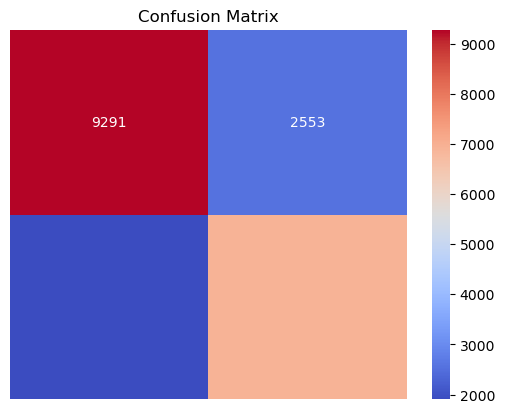

In [56]:
sns.heatmap(matrix,annot=True,fmt="d",cmap='coolwarm')
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

In [57]:
print("Training Score: ", round(lg.score(x_train,y_train)*100))
print("Testing Score: ", round(lg.score(x_test,y_test['satisfaction_satisfied'])*100))

Training Score:  78
Testing Score:  78


In [58]:
#Checking Accuracy
accuracy = round((9204+7058)/(9204+7058+1842+2581),2)*100
accuracy

79.0

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['satisfaction_prediction']))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81     11844
           1       0.73      0.78      0.76      8841

    accuracy                           0.78     20685
   macro avg       0.78      0.78      0.78     20685
weighted avg       0.79      0.78      0.79     20685



In [119]:
#Interview Question 
#Formula of Metrics Evaluation (Precision, Accuraccy, recall, f1-score)

### Using Decision Tree

In [87]:
x_train.shape

(82737, 12)

In [91]:
x_test.shape

(20685, 12)

In [93]:
y_train.shape

(82737, 1)

In [95]:
y_test.shape

(20685, 1)

In [97]:
#Model Training using Decision Trees
from sklearn.tree import DecisionTreeClassifier

In [107]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Model Performance (Model Evaluation)
print("Training Score: ", round(dt.score(x_train,y_train),2)*100)
print("Testing Score: ", round(dt.score(x_test,y_test),2)*100)

Training Score:  100.0
Testing Score:  82.0


In [109]:
#Generate Classification Report, Confusion Matrix
#Predicions find, Saving the model

## Random Forest

In [122]:
#It is a combination of multiple decision trees

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rdf = RandomForestClassifier()

In [130]:
rdf.fit(x_train,y_train)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_14756\1942363320.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdf.fit(x_train,y_train)


RandomForestClassifier()

In [132]:
print("Training Score: ", round(rdf.score(x_train,y_train),2)*100)
print("Testing Score: ", round(rdf.score(x_test,y_test),2)*100)

Training Score:  100.0
Testing Score:  87.0


In [138]:
rdf2 = RandomForestClassifier(max_depth=8, min_samples_leaf=25, min_samples_split = 55)

In [140]:
rdf2.fit(x_train,y_train)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_14756\2707250443.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdf2.fit(x_train,y_train)


RandomForestClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=55)

In [142]:
print("Training Score: ", round(rdf.score(x_train,y_train),2)*100)
print("Testing Score: ", round(rdf.score(x_test,y_test),2)*100)

print("Training Score: ", round(rdf2.score(x_train,y_train),2)*100)
print("Testing Score: ", round(rdf2.score(x_test,y_test),2)*100)

Training Score:  100.0
Testing Score:  87.0
Training Score:  87.0
Testing Score:  87.0
